In [6]:
import itertools
import random
import numpy as np
from collections import defaultdict, Counter

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
import networkx as nx

In [7]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../data/'

## random graphs

## 1. Python's `random` module

Many network models rely on randomness in their generative algorithms. Python's [random module](https://docs.python.org/3.7/library/random.html) provides four key functions of use when coding network models.

#### `random.random`

Often in an algorithm, we need something to happen with some probability $p$. The canonical way to decide whether or not such an event happens is to generate a random number $r$ between 0 and 1, and if $r < p$, then the event occurs. The [random.random()](https://docs.python.org/3.7/library/random.html#random.random) function returns just such a random number in the interval [0, 1).


####  `random.choice`

When we have a population of discrete choices and we need to select one at random, we use [random.choice()](https://docs.python.org/3.7/library/random.html#random.choice). For example, instead of "[eeny, meeny, miny, moe](https://en.wikipedia.org/wiki/Eeny,_meeny,_miny,_moe)," we can use random.choice to choose a random name:

In [ ]:
names = ['Alice', 'Bob', 'Cathy', 'Dan']
rd.choice(names)

'Alice'

#### `random.sample`

If we have a collection and we need to select more than one element without replacement, we use [random.sample()](https://docs.python.org/3.7/library/random.html#random.sample). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

In [ ]:
G = nx.cycle_graph(5)
rd.sample(G.nodes, 2)

[1, 4]

#### `random.choices`

We use [random.choices()](https://docs.python.org/3.7/library/random.html#random.choices) when we need to choose an element from a collection when the chances of selecting each element are not identical.

For an example, let's assume Alice, Bob, and Carol are in a raffle drawing. Alice bought one ticket, Bob bought three tickets, and Carol bought four tickets. We can simulate ten different draws of this raffle, replacing the drawn ticket each time, with the following code:

In [ ]:
names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(10):
    print(rd.choices(names, tickets))

['Carol']
['Bob']
['Bob']
['Bob']
['Bob']
['Bob']
['Bob']
['Carol']
['Carol']
['Bob']


Running the above cell should give what we expect: Carol wins the drawing most often, with Bob winning some times, and Alice winning occasionally. Of course this outcome depends on the luck of the draw!

By specifying the keyword argument `k=`, we can choose *k* items from the collection *with replacement*:

In [ ]:
rd.choices(names, tickets, k=10)

['Carol',
 'Carol',
 'Alice',
 'Carol',
 'Alice',
 'Bob',
 'Carol',
 'Carol',
 'Carol',
 'Carol']

The weights provided to `random.choices` do not have to be integers -- any numeric weights are fine.

### Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes $N$, and the link probability $p$. As in the book text, the algorithm for creating this network is as follows:

1. Select a pair of nodes, say i and j.
2. Generate a random number r between 0 and 1. If r < p, then add a link between i and j.
3. Repeat (1) and (2) for all pairs of nodes.

We'll need a couple of tools from Python for this task:

### Generating combinations

We've previously looped over all nodes in a graph, as well as all graph edges, but this algorithm requires us to loop over all *pairs* of nodes, *i.e.* all possible edges. The `itertools` module in Python's standard library gives us the [combinations()](https://docs.python.org/3.7/library/itertools.html#itertools.combinations) function, an elegant way to loop over pairs of elements in a sequence:

In [ ]:
import itertools


elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

The second argument to `itertools.combinations()` is the length of the sequences we want in the output. Since we want pairs, we'll specify 2. Note the nice properties of the output:

1. No repeat elements -- we don't want to consider self-loops like `('a', 'a')`.
2. Pairs are in sorted order -- `('a', 'b')` and `('b', 'a')` are the same edge in an undirected graph.

We can thus use this to loop over all pairs of nodes in a graph:

In [ ]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Erdös-Rényi random graph model

Instead of specifying the link probability $p$, we can also generate a graph of $N$ nodes with exactly $M$ edges by using `random.sample()` to choose M of the possible edges generated with `itertools.combinations()`:

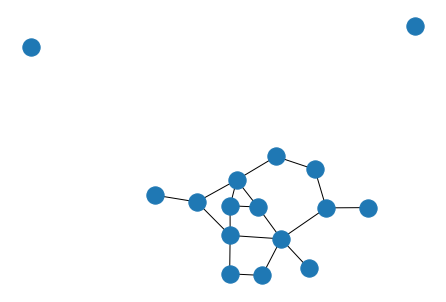

In [ ]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = rd.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G

G = gnm_random_graph(16, 18)
nx.draw(G)

### Gilbert random graph model

With these tools in our toolbelt, we can code the algorithm for the Gilbert random graph model.

Graph has 69 edges.


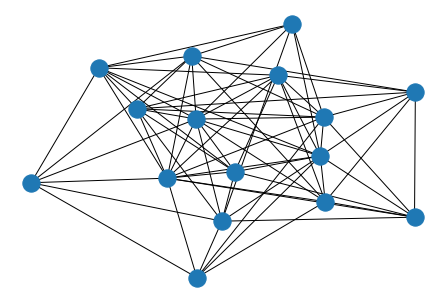

In [ ]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = rd.random()
        if r < p:   
            G.add_edge(i, j)
        # Do nothing if r >= p
        
    return G
    
G = gnp_random_graph(16, 0.5)
nx.draw(G)
print('Graph has', G.number_of_edges(), 'edges.')

### NetworkX functions

NetworkX has a function for the $G_{n,p}$ random graph specifying number of nodes $N$ and link probability $p$:  [gnp_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html).

In addition, NetworkX provides [gnm_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html), which generates a $G_{n,m}$ graph, where we specify the number of nodes $N$ and the desired number of edges $M$.

### generate a network directly from a given matrix

you can define a numpy matrix and convert it into a Graph object


In [ ]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
print(A_symmetric)

[[0 0 1 0 0 0 1 1]
 [0 0 1 0 1 1 0 0]
 [1 1 0 0 1 0 0 1]
 [0 0 0 0 0 1 1 0]
 [0 1 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 1]
 [1 0 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 0]]


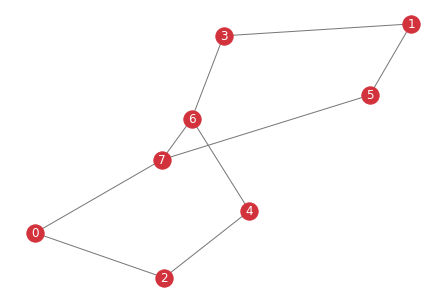

In [ ]:
G = nx.from_numpy_array(A_symmetric)

nx.draw(G,
        with_labels=True,
        node_color='#d2323c',
        edge_color='#777777',
        node_size=300,
        font_color='white',
        font_size=12,
        )


for DIRECTED networks it works like this:


[[0 1 0 0 0 0 1 1]
 [0 0 1 1 1 0 0 1]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


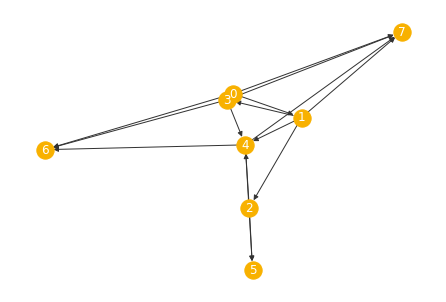

In [ ]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A[np.tril_indices(A.shape[0], -1)] = 0  # set the lower left triangle to 0
np.fill_diagonal(A, 0) # write zeros on the diagonal to avoid selfloops

print(A)

# make explicit that you want the network to be directed
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

nx.draw(G,
        with_labels=True,
        node_color='#f8b100',
        edge_color='#333333',
        node_size=300,
        font_color='white',
        font_size=12,
        )


and for WEIGHTED networks:


[[0.         0.67341973 0.74935817 0.80896872 0.60288855 0.2390995 ]
 [0.67341973 0.         0.04970011 0.89531271 0.01729003 0.87241347]
 [0.74935817 0.04970011 0.         0.68498996 0.53919489 0.51564664]
 [0.80896872 0.89531271 0.68498996 0.         0.63241681 0.11108197]
 [0.60288855 0.01729003 0.53919489 0.63241681 0.         0.26452065]
 [0.2390995  0.87241347 0.51564664 0.11108197 0.26452065 0.        ]]


{0: Text(0.03638268866252145, -0.004747137899181547, '0'),
 1: Text(0.5637344785191452, -0.825424310871147, '1'),
 2: Text(-0.6794801386768701, 0.33735145492260354, '2'),
 3: Text(0.6325557953390508, 0.2611684953531016, '3'),
 4: Text(-0.07320155281341877, 1.0, '4'),
 5: Text(-0.4799912710304282, -0.7683485015053767, '5')}

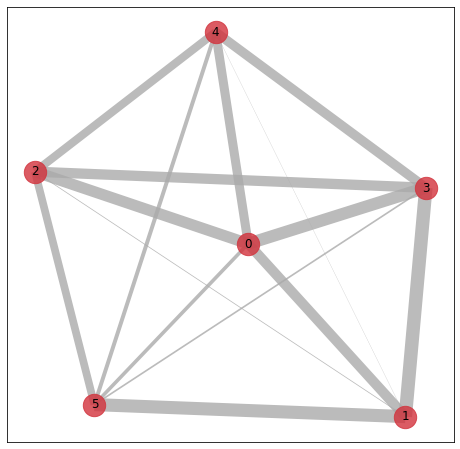

In [ ]:
N = 6
A = np.random.uniform(0,1,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops

print(A_symmetric)


G = nx.from_numpy_array(A_symmetric)


l_w = []
for a,b in G.edges():
    l_w.append(G[a][b]['weight'])


plt.figure(figsize=(8,8))

pos = nx.spring_layout(G)

edgewidth = [15*d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos=pos, width=edgewidth,edge_color='#aaaaaa',alpha=.8)

nx.draw_networkx_nodes(G, pos=pos, node_size=500,node_color='#d2323c',alpha=.8)

nx.draw_networkx_labels(G, pos=pos)

---
# Exercise 1  (8 pts)

Consider a Gilbert random graphs with $N=500$ nodes

(i) For a given connection probability $p=0.01$ compute the average degree $\langle k\rangle$, the number of connected components, diameter and the average shortest path length. Plot the degree distribution. 

(3pts)

(ii) Iterate over a range of connection probabilities and measure the average degree  $\langle k\rangle$ 

Plot $\langle k\rangle$ over $p$ and compare the result to your expectation. 

(3pts)

(iii)
Iterate over a range of connection probabilities and measure the size of the largest connected component $S_{lcc}$ now. 
(You can do both measurements for ii and iii in one loop)


Plot $S_{lcc}$ over $p$ and make sure that you can see the different regimes of connectedness.  

Plot $S_{lcc}$ also over the average the average degree and discuss briefly what you observe. 

(2pts)

---

### The cumulative degree distribution

In [ ]:
# Quick guide how to construct the cumulative degree distribution
N = 10000
m =3
G = nx.barabasi_albert_graph(N,m)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
freq = 1.0*cs/sum(cs)

plt.figure(figsize=(7,6))

plt.loglog(deg, freq, '.')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")


# Exercise 2 (8 pts)

Degree dynamics and degree distribution of Barabasi-Albert (BA) -networks.

(i) **Initial Setup:**
   - Start with an initial Barabasi-Albert (BA) network containing approximately 100 nodes and an initial degree of 4.

(ii) **Network Growth:**
   - Use the `nx.barabasi_albert_graph()` method with the `initial_graph` argument to iterate over an increasing number of nodes. This will grow the network according to the Barabasi-Albert model.

(iii) **Node Selection:**
   - Pick a group of nodes from your seed graph (the initial BA network) that you can track along with their degree in the growing network.

(iv) **Plotting and scaling analysis:**
   - Plot the results with the number of nodes on the x-axis and the degree on the y-axis.
   - Analyze the plot and identify the scaling behavior.
   - Attempt to fit the data to a power-law distribution to assess whether you can reproduce the preferential attachment and its scaling of the degree (k) over time.


(v) **degree distribution analysis**
   - Consider the largest BA network resulting from the final iteration in (iii)
   -  Plot the cumulative degree distribution and compare it to both, the result from the estimation

   $$p_k = 2m^2 k^{-3}$$

   - and the result from the Master equation 

   $$p_k = \frac{2m(m+1)}{k(k+1)(k+2)}.$$
   

Hint: You can find some tutorial cells about fitting a model to data points in the `Python tutorial` in the `Plots` section
(4pts)

---

## Exercise (8pts)

Compare three real-world datasets:

`protein.edgelist.txt`

`collaboration.edgelist.txt`

`powergrid.edgelist.txt`

(They can be downloaded from the github repo and imported using the `nx.read_edgelist` command)

(i) 
Plot the cumulative degree distribution for each network.  
(3pts)

(ii)
Test for all three data sets both, a power-law and a exponential distribution.
(3pts)

(iii)
Estimate the exponent if you find a power-law or the decay parameter in the exponential case, respectively.   (a rough fitting is enough, no optimized fitting procedure needed)
(2pts)

